In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

# import dataset 


In [3]:
housing_df = pd.read_csv("D:\\Data_Challenge\\Python Data Wrangling\\kaggle_california_housing_prices\\housing.csv")

In [4]:
housing_df.sample(5)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
18597    -122.08     37.08                35.0       1541.0           297.0   
6200     -117.89     34.08                35.0       1711.0           335.0   
12424    -116.11     33.64                20.0       1273.0           354.0   
720      -122.10     37.68                37.0       2116.0           503.0   
2874     -118.96     35.37                40.0       1603.0           374.0   

       population  households  median_income  median_house_value  \
18597       791.0       277.0         4.4250            204800.0   
6200        825.0       356.0         3.5000            215600.0   
12424      1548.0       355.0         2.0871             84700.0   
720        1109.0       448.0         2.5350            174000.0   
2874       1026.0       337.0         1.3650             54300.0   

      ocean_proximity  
18597      NEAR OCEAN  
6200        <1H OCEAN  
12424          INLAND  
720          NEAR BAY  
2874           INLAND

In [5]:
housing_df.head(10)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   
8    -122.26     37.84                42.0       2555.0           665.0   
9    -122.25     37.84                52.0       3549.0           707.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
5       413.0       193.0         4.0368            269700.0        NEAR BAY  
6      1094.0       514.0         3.6591            299200.0        NEAR BAY  
7      1157.0       647.0         3.1200            241400.0        NEAR BAY  
8      1206.0       595.0         2.0804            226700.0        NEAR BAY  
9      1551.0       714.0         3.6912            261100.0        NEAR BAY

# handling missing values 

## drop rows with missing value

In [6]:
housing_df = housing_df.dropna()

In [7]:
housing_df.shape

(20433, 10)

In [8]:
housing_df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20433.000000  20433.000000        20433.000000  20433.000000   
mean    -119.570689     35.633221           28.633094   2636.504233   
std        2.003578      2.136348           12.591805   2185.269567   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1450.000000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.720000           37.000000   3143.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20433.000000  20433.000000   20433.000000   
mean       537.870553   1424.946949    499.433465       3.871162   
std        421.385070   1133.208490    382.299226       1.899291   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563700   
50%        435.000000   1166.000000    409.000000       3.536500   
75%        647.000000   1722.000000    604.000000       4.744000   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20433.000000  
mean        206864.413155  
std         115435.667099  
min          14999.000000  
25%         119500.000000  
50%         179700.000000  
75%         264700.000000  
max         500001.000000

# exploring data set using visualizatiuon

In [11]:
housing_df.loc[housing_df['median_house_value'] == 500001.000000].count()

longitude             958
latitude              958
housing_median_age    958
total_rooms           958
total_bedrooms        958
population            958
households            958
median_income         958
median_house_value    958
ocean_proximity       958
dtype: int64

### filter by condition using df.loc[]

### avoid an upper cap ==> too many occurrence of a column value  

to avoid this upper cap, we hae to identify the index of records with the same value, and then drop the corresponding rows

In [19]:
housing_df = housing_df.drop(housing_df.loc[housing_df['median_house_value'] == 500001].index)

In [20]:
housing_df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  19475.000000  19475.000000        19475.000000  19475.000000   
mean    -119.564306     35.653372           28.378074   2620.491142   
std        2.006241      2.150250           12.515373   2184.938093   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.760000     33.930000           18.000000   1441.000000   
50%     -118.500000     34.270000           28.000000   2111.000000   
75%     -117.990000     37.730000           37.000000   3118.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    19475.000000  19475.000000  19475.000000   19475.000000   
mean       539.645751   1440.290732    501.093504       3.676739   
std        422.413200   1144.399323    383.206416       1.569263   
min          2.000000      3.000000      2.000000       0.499900   
25%        297.000000    796.000000    282.000000       2.526500   
50%        436.000000   1178.000000    411.000000       3.451900   
75%        648.000000   1743.000000    606.000000       4.583300   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        19475.000000  
mean        192444.651913  
std          97702.625782  
min          14999.000000  
25%         116500.000000  
50%         173800.000000  
75%         248100.000000  
max         500000.000000

In [21]:
housing_df.shape

(19475, 10)

In [23]:
housing_df.head(15)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0     -122.23     37.88                41.0        880.0           129.0   
1     -122.22     37.86                21.0       7099.0          1106.0   
2     -122.24     37.85                52.0       1467.0           190.0   
3     -122.25     37.85                52.0       1274.0           235.0   
4     -122.25     37.85                52.0       1627.0           280.0   
5     -122.25     37.85                52.0        919.0           213.0   
6     -122.25     37.84                52.0       2535.0           489.0   
7     -122.25     37.84                52.0       3104.0           687.0   
8     -122.26     37.84                42.0       2555.0           665.0   
9     -122.25     37.84                52.0       3549.0           707.0   
10    -122.26     37.85                52.0       2202.0           434.0   
11    -122.26     37.85                52.0       3503.0           752.0   
12    -122.26     37.85                52.0       2491.0           474.0   
13    -122.26     37.84                52.0        696.0           191.0   
14    -122.26     37.85                52.0       2643.0           626.0   

    population  households  median_income  median_house_value ocean_proximity  
0        322.0       126.0         8.3252            452600.0        NEAR BAY  
1       2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2        496.0       177.0         7.2574            352100.0        NEAR BAY  
3        558.0       219.0         5.6431            341300.0        NEAR BAY  
4        565.0       259.0         3.8462            342200.0        NEAR BAY  
5        413.0       193.0         4.0368            269700.0        NEAR BAY  
6       1094.0       514.0         3.6591            299200.0        NEAR BAY  
7       1157.0       647.0         3.1200            241400.0        NEAR BAY  
8       1206.0       595.0         2.0804            226700.0        NEAR BAY  
9       1551.0       714.0         3.6912            261100.0        NEAR BAY  
10       910.0       402.0         3.2031            281500.0        NEAR BAY  
11      1504.0       734.0         3.2705            241800.0        NEAR BAY  
12      1098.0       468.0         3.0750            213500.0        NEAR BAY  
13       345.0       174.0         2.6736            191300.0        NEAR BAY  
14      1212.0       620.0         1.9167            159200.0        NEAR BAY

In [24]:
housing_df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

## One hot Encoding to the column ocean_proximity

In [25]:
housing_df = pd.get_dummies(housing_df, columns = ["ocean_proximity"])

In [28]:
housing_df.sample(15)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
10222    -117.89     33.88                33.0       1582.0           256.0   
10119    -117.92     33.94                30.0       2506.0           394.0   
5998     -117.74     34.09                30.0       3199.0           591.0   
11776    -121.28     38.76                47.0       2901.0           631.0   
11676    -118.00     33.85                33.0       2053.0           418.0   
20147    -119.08     34.34                23.0       3065.0           723.0   
9420     -122.62     37.85                30.0        833.0           164.0   
1343     -121.89     38.01                32.0       1000.0           188.0   
2987     -119.01     35.33                32.0       3068.0           628.0   
1685     -122.28     37.99                28.0       3801.0           622.0   
17442    -120.46     34.66                 5.0       2904.0           702.0   
13016    -121.18     38.69                 7.0       7104.0           970.0   
2104     -119.77     36.75                44.0       1818.0           412.0   
15905    -122.41     37.74                52.0        831.0           175.0   
5848     -118.31     34.18                11.0       3112.0           890.0   

       population  households  median_income  median_house_value  \
10222       771.0       240.0         5.3836            229600.0   
10119      1255.0       421.0         4.7813            198200.0   
5998       2192.0       563.0         3.4871            136400.0   
11776      1276.0       578.0         2.1366            101900.0   
11676      1154.0       405.0         4.0455            197200.0   
20147      2042.0       698.0         2.7593            194800.0   
9420        358.0       143.0         6.8198            493800.0   
1343        663.0       212.0         4.0972             99200.0   
2987       1897.0       607.0         2.4234             63700.0   
1685       1654.0       571.0         4.3750            193300.0   
17442      1302.0       618.0         3.0081            135200.0   
13016      2772.0       920.0         6.3528            274500.0   
2104       1680.0       418.0         1.7083             48300.0   
15905       415.0       159.0         1.9464            249000.0   
5848       1700.0       851.0         3.1587            181300.0   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
10222                          1                       0   
10119                          1                       0   
5998                           0                       1   
11776                          0                       1   
11676                          1                       0   
20147                          1                       0   
9420                           0                       0   
1343                           0                       1   
2987                           0                       1   
1685                           0                       0   
17442                          0                       0   
13016                          0                       1   
2104                           0                       1   
15905                          0                       0   
5848                           1                       0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
10222                       0                         0   
10119                       0                         0   
5998                        0                         0   
11776                       0                         0   
11676                       0                         0   
20147                       0                         0   
9420                        0                         0   
1343                        0                         0   
2987                        0                         0   
1685                        0                         1   
17442                       0              

In [27]:
housing_df.shape

(19475, 14)

## create Training Set with X & Y, and so on fot the test set

In [29]:
X = housing_df.drop('median_house_value', axis =1)
Y = housing_df['median_house_value']

In [30]:
print(X.shape)
print(Y.shape)

(19475, 13)
(19475,)


## Data Partitionning 

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state = 4)

In [34]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(15580, 13)
(3895, 13)
(15580,)
(3895,)


## Linear Regression Estimator with built in normalization

In [42]:
linear_model = LinearRegression(normalize = True).fit(x_train,y_train)

In [50]:
print("Training score : ", linear_model.score(x_train, y_train))

Training score :  0.6126579392056192


#### R^2 is a measure of how well our linear model captures the underlying variation in our training data

#### the training score of the Linear Regression algorythms is R-Square : R^2 

In [51]:
predictors = x_train.columns

In [54]:
predictors

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

### use the model to predict the y_test by passing the x_test

In [55]:
y_pred = linear_model.predict(x_test)

In [56]:
y_pred

array([318175.82862078, 133412.3378468 , 221875.54859562, ...,
       208436.94015016, 271485.93740232, 347342.76913175])

In [57]:
df_pred_actual = pd.DataFrame({'predicted' : y_pred, 'actual' : y_test})

df_pred_actual.head(15)

predicted    actual
12733  318175.828621  320200.0
9062   133412.337847  107500.0
16677  221875.548596  236100.0
7172   144202.385544  133000.0
18475  217370.081797  239300.0
8125   229447.284508  216700.0
2664   149925.060465  101900.0
14257  138059.924322   79400.0
1568   313319.694374  324600.0
6441   142310.236515  201700.0
14024  233978.961298  302200.0
4450   142568.343392  168800.0
16159  206143.120123  318500.0
19952  130348.222497   78200.0
18427  205780.293428  123400.0

## Model Evaluation  - R^2 on testing data

In [60]:
print("Testing_score : ", r2_score(y_test, y_pred))

Testing_score :  0.6129568499484437


### Data vizualization

### scatter plot 

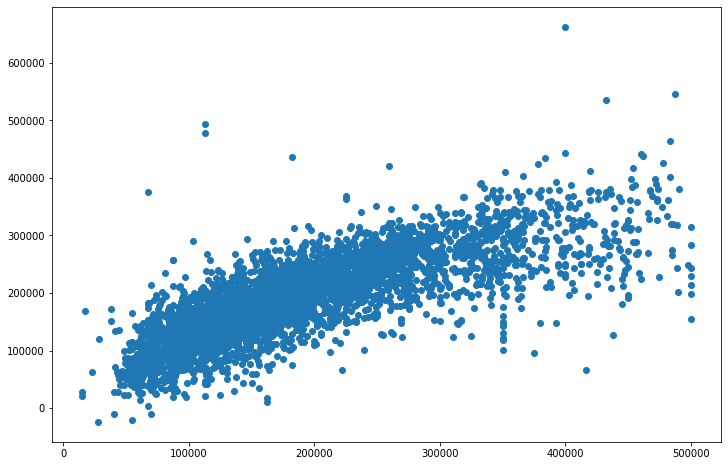

In [65]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(y_test, y_pred)
plt.show()

In [67]:
df_pred_actual_sample = df_pred_actual.sample(100)
df_pred_actual_sample = df_pred_actual_sample.reset_index()

In [68]:
df_pred_actual_sample.head()

index      predicted    actual
0   2746  137656.083601   86400.0
1   4144  229466.539310  170600.0
2   3118   49875.139708   54300.0
3  18651  222272.695786  228500.0
4  14573  272541.984790  283800.0

## Line Chart

In [74]:
plt.figure(figsize = (30,15))

plt.plot(df_pred_actual_sample['predicted'], label ='Predicted')
plt.plot(df_pred_actual_sample['actual'], label ='Actual')

plt.ylabel('median_house_value')
plt.legend()
plt.show()